In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [400, 200]

train_path = "/content/drive/My Drive/Dataset/Train"
valid_path = "/content/drive/My Drive/Dataset/Test"



# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in vgg.layers:
    layer.trainable = False


folders = glob("/content/drive/My Drive/Dataset/Train/*")

#extra layers 
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size = (400, 200),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,target_size = (400, 200),batch_size = 32,class_mode = 'categorical')


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 100, 128)     147584    
                                                              

In [4]:

r = model.fit(training_set,validation_data=test_set,epochs=5,
              steps_per_epoch=len(training_set)
              ,validation_steps=len(test_set))

Epoch 1/5
27/27 [==============================] - 193s 7s/step - loss: 1.1700 - accuracy: 0.7506 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 2/5
27/27 [==============================] - 20s 756ms/step - loss: 0.0119 - accuracy: 0.9988 - val_loss: 9.5037e-04 - val_accuracy: 1.0000
Epoch 3/5
27/27 [==============================] - 22s 805ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.1382e-04 - val_accuracy: 1.0000
Epoch 4/5
27/27 [==============================] - 21s 784ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9489e-04 - val_accuracy: 1.0000
Epoch 5/5
27/27 [==============================] - 20s 756ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6633e-04 - val_accuracy: 1.0000


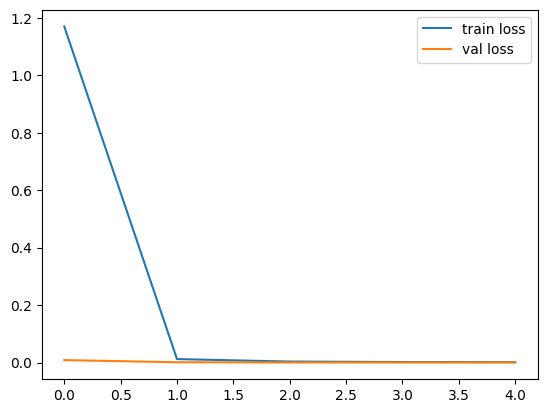

<Figure size 640x480 with 0 Axes>

In [5]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

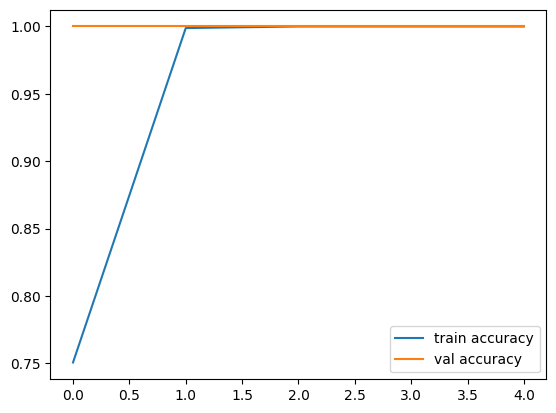

<Figure size 640x480 with 0 Axes>

In [6]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [7]:
## SAVING
import tensorflow as tf
from keras.models import load_model
model.save('vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
